# Gasoline-4-GDP by:  Alex Osterneck, CLA, MSCS   // July 7th, 2025.  



In [ ]:


## data-science analysis colab by:  Alex Osterneck, CLA, MSCS

## pbix intro-analytics: U.S. Gas-Prices below $2.50 linked to 2.55% GDP Growth

## python / matplotlib main-analytics: GDP-Growth by GAS-Price range: < $2.30: Mean = 2.08%, Std = 0.44%  /  $ 2.30 – $2.70: Mean = 3.166%, Std = 0.51%  /  > $2.70: Mean = 1.90%, Std = 0.82%




from IPython.display import IFrame

# Your Power BI embed URL
url = "https://app.powerbi.com/reportEmbed?reportId=2d224692-4faa-4ed1-83c0-7142dbfe1eeb&autoAuth=true&ctid=a8edc49a-41f1-4c69-9768-a7f6d7c3b8c3"

# Show the Power BI report in Colab
IFrame(src=url, width='100%', height=600)


In [ ]:
print("\n*****GasPrice QUARTERLY-DATA:*****")
print(gas_prices_df.to_string(index=False))



*****GasPrice QUARTERLY-DATA:*****
 Unnamed: 0       Date  US_Regular_Gas_Price
          1 2015-07-01                 2.620
          4 2015-10-01                 3.060
          7 2016-01-01                 2.455
         10 2016-04-01                 2.543
         13 2016-07-01                 2.537
         16 2016-10-01                 2.948
         19 2017-01-01                 2.244
         22 2017-04-01                 2.759
         25 2017-07-01                 2.064
         28 2017-10-01                 2.960
         31 2018-01-01                 2.613
         34 2018-04-01                 2.396
         37 2018-07-01                 2.861
         40 2018-10-01                 2.185
         43 2019-01-01                 3.085
         46 2019-04-01                 2.124
         49 2019-07-01                 2.436
         52 2019-10-01                 2.347
         55 2020-01-01                 2.628
         58 2020-04-01                 2.310
         61 2020-07

In [ ]:
import pandas as pd

# Read in GDPNow and Gas Prices Excel files
gdpnow_df = pd.read_excel('/content/drive/MyDrive/GDPNOW.xlsx')
gas_prices_df = pd.read_excel('/content/drive/MyDrive/Filtered_Gas_Prices.xlsx')

# Set Pandas to display all rows and columns (remove scroll)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print("*****GDPNow QUARTERLY-DATA:*****")
print(gdpnow_df.to_string(index=False))


*****GDPNow QUARTERLY-DATA:*****
observation_date  GDPNOW1
      2015-07-01   1.0637
      2015-10-01   1.0179
      2016-01-01   0.6209
      2016-04-01   1.8333
      2016-07-01   2.0953
      2016-10-01   2.8814
      2017-01-01   0.1699
      2017-04-01   2.8194
      2017-07-01   2.7182
      2017-10-01   3.4060
      2018-01-01   1.9834
      2018-04-01   3.8225
      2018-07-01   3.5537
      2018-10-01   1.8466
      2019-01-01   2.6711
      2019-04-01   1.3334
      2019-07-01   1.6752
      2019-10-01   1.7394
      2020-01-01  -0.9691
      2020-04-01 -32.0844
      2020-07-01  36.9708
      2020-10-01   7.1600
      2021-01-01   7.8694
      2021-04-01   6.4265
      2021-07-01   0.1950
      2021-10-01   6.4986
      2022-01-01   0.3728
      2022-04-01  -1.2002
      2022-07-01   3.0885
      2022-10-01   3.5294
      2023-01-01   1.1326
      2023-04-01   2.4126
      2023-07-01   5.4052
      2023-10-01   2.3834
      2024-01-01   2.7047
      2024-04-01   2.6132
     

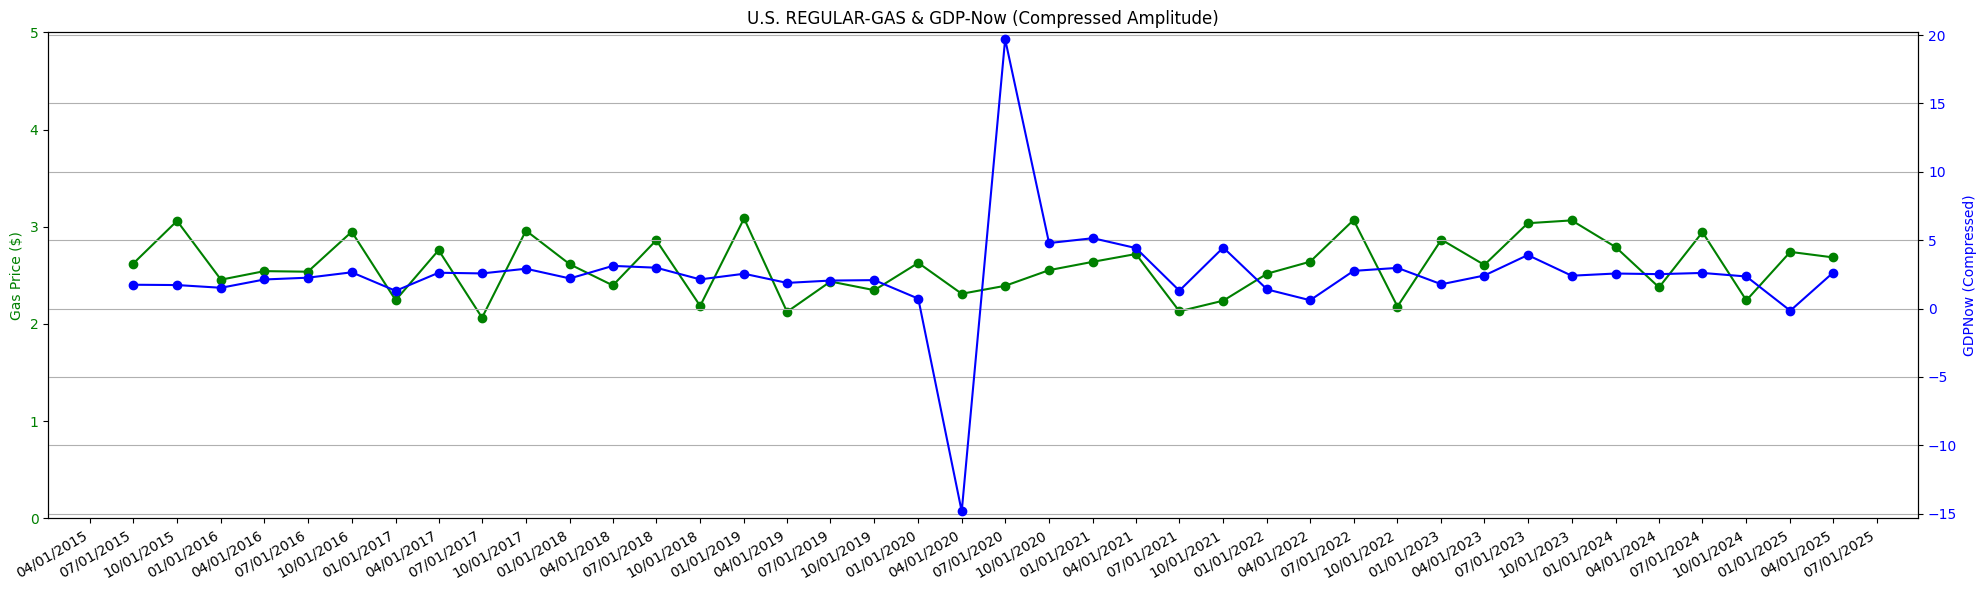

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# GDPNow variance compression (100%)
gdpnow_df['GDPNow_Compressed'] = (
    gdpnow_df['GDPNow'].mean() + (gdpnow_df['GDPNow'] - gdpnow_df['GDPNow'].mean()) * 0.5
)

# Dual-axis plot: raw gas price + compressed GDPNow
fig, ax1 = plt.subplots(figsize=(20, 6))

# Gas Price (left y-axis)
ax1.plot(gas_prices_df['Date'], gas_prices_df['GasPrice'], color='green', marker='o')
ax1.set_ylabel('Gas Price ($)', color='green')
ax1.set_ylim(0, 5)
ax1.tick_params(axis='y', labelcolor='green')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))

# Compressed GDPNow (right y-axis)
ax2 = ax1.twinx()
ax2.plot(gdpnow_df['Date'], gdpnow_df['GDPNow_Compressed'], color='blue', marker='o')
ax2.set_ylabel('GDPNow (Compressed)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(gdpnow_df['GDPNow_Compressed'].min() - 0.5, gdpnow_df['GDPNow_Compressed'].max() + 0.5)

# Final formatting
plt.title('U.S. REGULAR-GAS & GDP-Now (Compressed Amplitude)')
fig.autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()


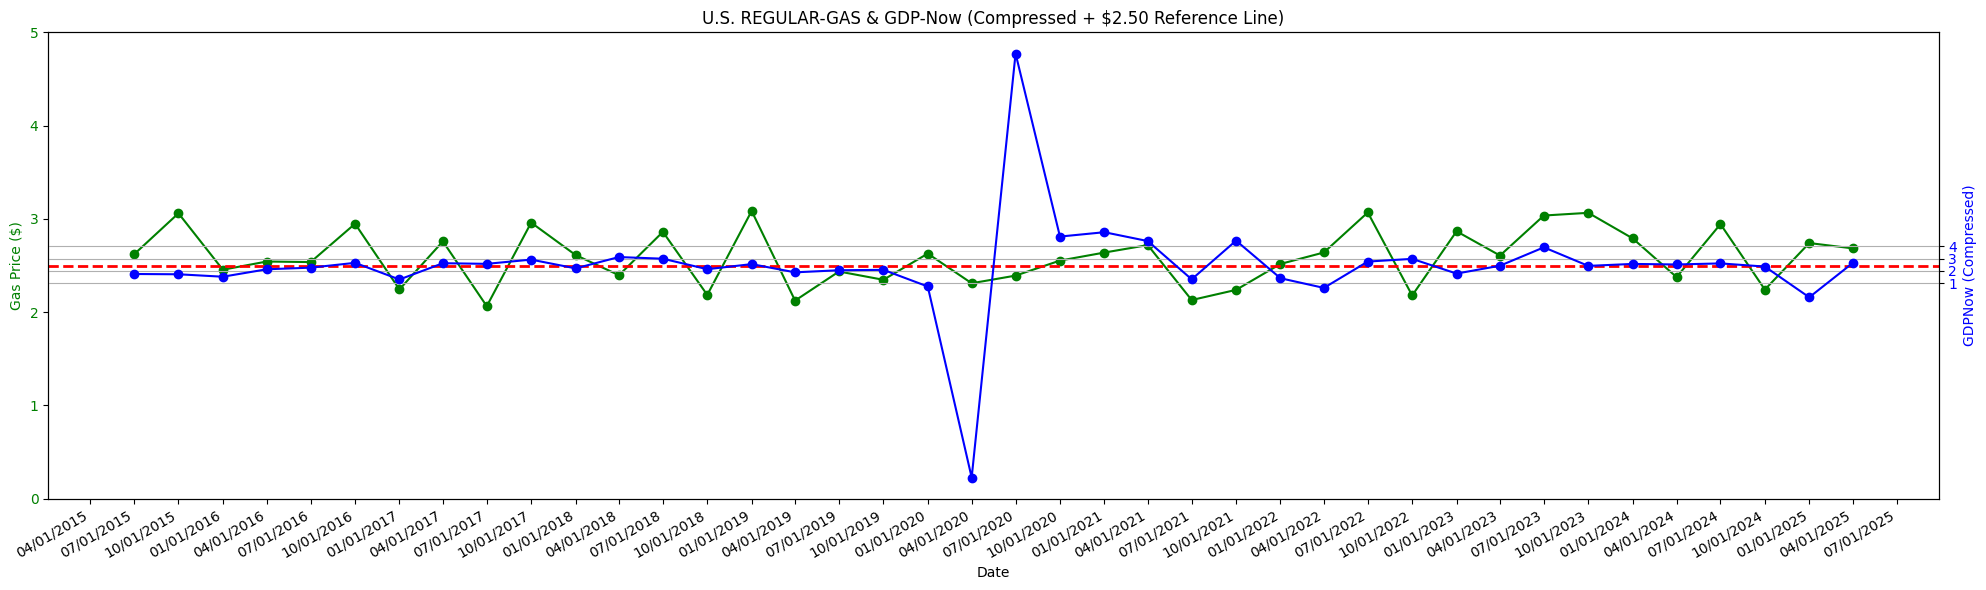

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot
fig, ax1 = plt.subplots(figsize=(20, 6))

# Gas Price (left Y-axis)
ax1.plot(gas_prices_df['Date'], gas_prices_df['GasPrice'], color='green', marker='o')
ax1.axhline(y=2.50, color='red', linestyle='--', linewidth=2)  # $2.50 threshold
ax1.set_ylabel('Gas Price ($)', color='green')
ax1.set_ylim(0, 5)
ax1.tick_params(axis='y', labelcolor='green')

# Restore wide, readable X-axis
ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
fig.autofmt_xdate()

# GDPNow (right Y-axis, compressed)
ax2 = ax1.twinx()
ax2.plot(gdpnow_df['Date'], gdpnow_df['GDPNow_Compressed'], color='blue', marker='o')
ax2.set_ylabel('GDPNow (Compressed)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_yticks([1, 2, 3, 4])  # Focused ticks only

# Title and grid
plt.title('U.S. REGULAR-GAS & GDP-Now (Compressed + $2.50 Reference Line)')
plt.grid(True)
plt.tight_layout()
plt.show()


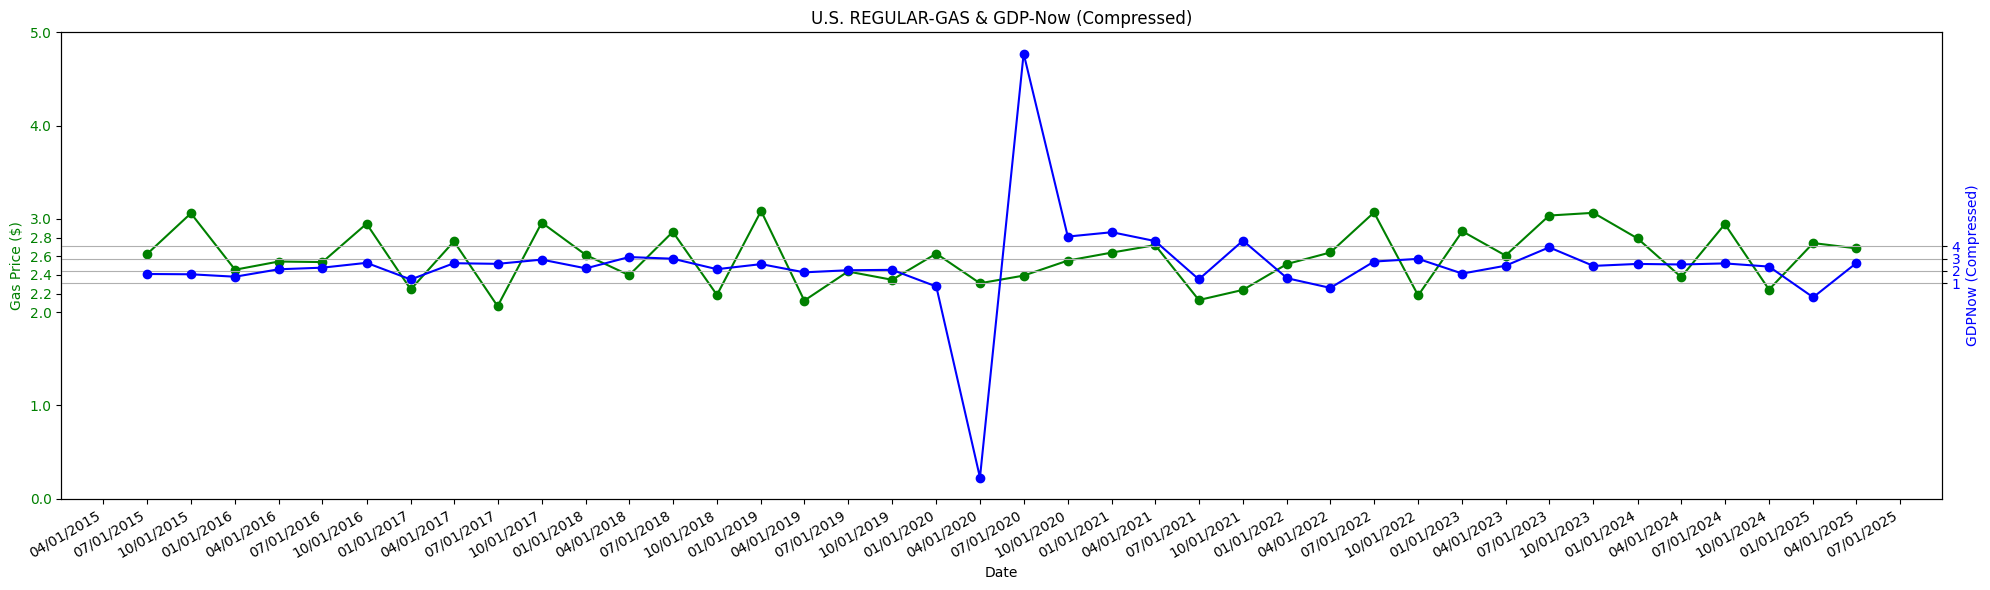

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot
fig, ax1 = plt.subplots(figsize=(20, 6))

# Gas Price (left Y-axis)
ax1.plot(gas_prices_df['Date'], gas_prices_df['GasPrice'], color='green', marker='o')
ax1.set_ylabel('Gas Price ($)', color='green')
ax1.set_ylim(0, 5)
ax1.set_yticks([0, 1, 2, 2.2, 2.4, 2.6, 2.8, 3, 4, 5])  # Add back focused ticks
ax1.tick_params(axis='y', labelcolor='green')

# X-axis formatting (wide 90-day layout)
ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
fig.autofmt_xdate()

# GDPNow (right Y-axis, compressed)
ax2 = ax1.twinx()
ax2.plot(gdpnow_df['Date'], gdpnow_df['GDPNow_Compressed'], color='blue', marker='o')
ax2.set_ylabel('GDPNow (Compressed)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_yticks([1, 2, 3, 4])

# Final touches
plt.title('U.S. REGULAR-GAS & GDP-Now (Compressed)')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-21-2863224273.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('2017-01-01', '2022-12-01', freq='M')
/tmp/ipython-input-21-2863224273.py:37: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(2.3, 2.7, alpha=0.4, color=pbix_blue, edgecolor='black', linewidth=1.5, label='Optimal Zone ($2.30–$2.70)')


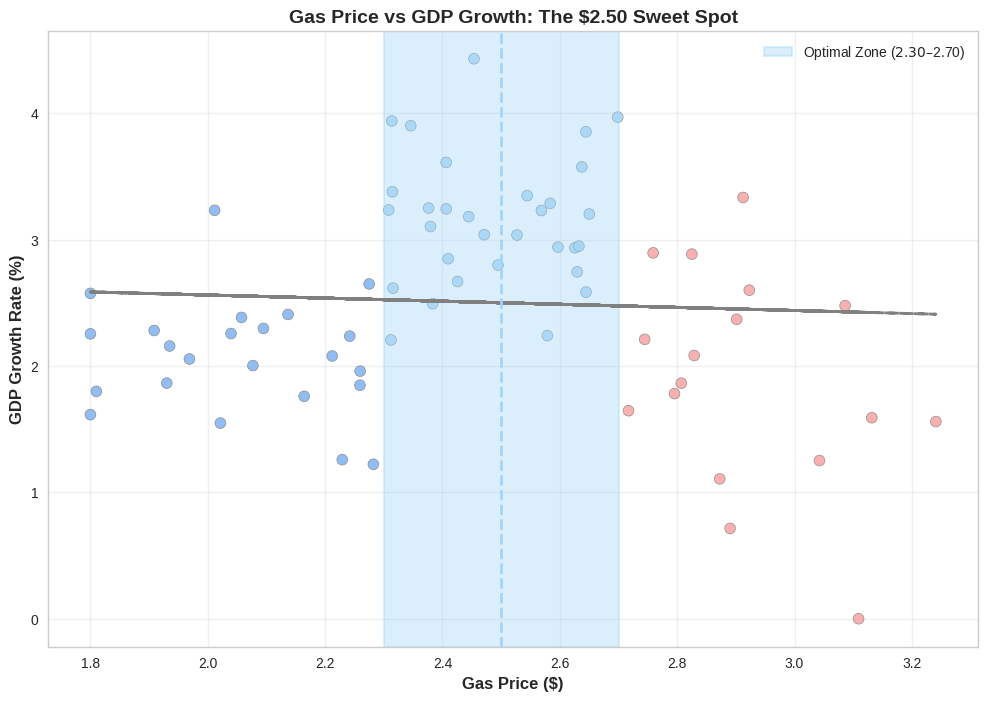

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Style + Colors
plt.style.use('seaborn-v0_8-whitegrid')
pbix_blue = '#A3D5F7'
below_blue = '#7FB2F0'
above_red = '#F7A3A3'

# Simulate Data
np.random.seed(42)
dates = pd.date_range('2017-01-01', '2022-12-01', freq='M')
gas_prices = np.clip(np.random.normal(2.5, 0.4, len(dates)), 1.8, 3.5)
gdp_growth = [np.random.normal(3.2, 0.5) if 2.3 <= p <= 2.7 else
              np.random.normal(2.1, 0.6) if p < 2.3 else
              np.random.normal(1.8, 0.7) for p in gas_prices]
gdp_growth = [max(g, 0) for g in gdp_growth]

colors = [pbix_blue if 2.3 <= p <= 2.7 else
          above_red if p > 2.7 else
          below_blue for p in gas_prices]

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(gas_prices, gdp_growth, c=colors, s=60, alpha=0.85,
            edgecolors='gray', linewidth=0.5)

# Regression line (no R² label)
slope, intercept, r_value, p_value, std_err = stats.linregress(gas_prices, gdp_growth)
line = slope * np.array(gas_prices) + intercept
plt.plot(gas_prices, line, 'gray', linestyle='--', linewidth=2)

# Highlight Optimal Zone
plt.axvspan(2.3, 2.7, alpha=0.4, color=pbix_blue, edgecolor='black', linewidth=1.5, label='Optimal Zone ($2.30–$2.70)')
plt.axvline(x=2.5, color=pbix_blue, linestyle='--', linewidth=2)

# Labels
plt.xlabel('Gas Price ($)', fontsize=12, fontweight='bold')
plt.ylabel('GDP Growth Rate (%)', fontsize=12, fontweight='bold')
plt.title('Gas Price vs GDP Growth: The $2.50 Sweet Spot', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


/tmp/ipython-input-23-809992814.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(gdp_by_range, labels=price_ranges, patch_artist=True)


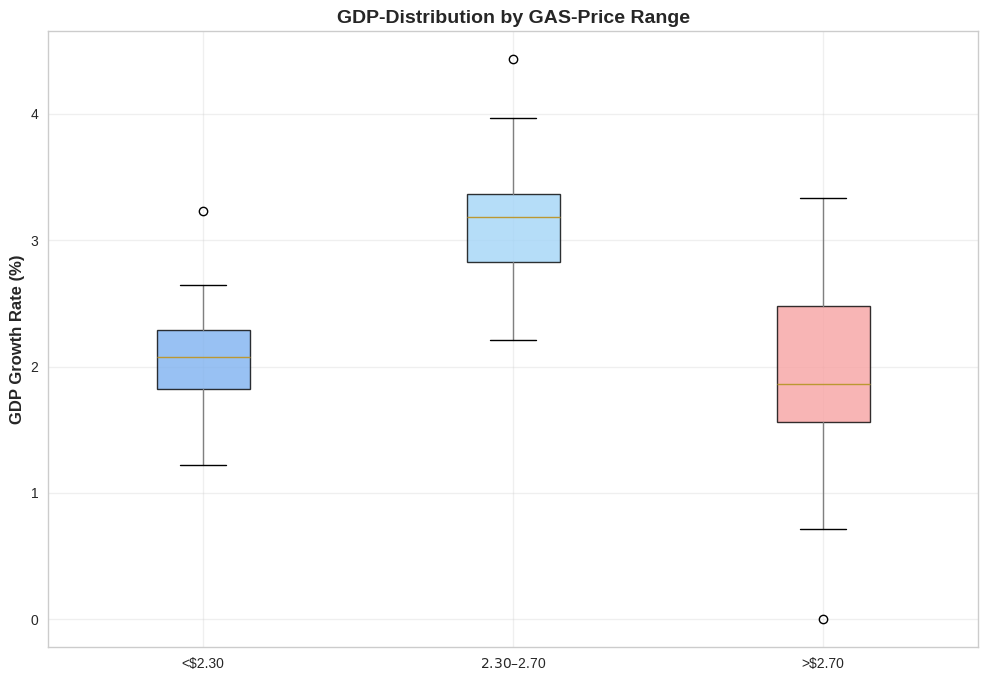

In [ ]:
plt.figure(figsize=(12, 8))  # Match visual size
box = plt.boxplot(gdp_by_range, labels=price_ranges, patch_artist=True)
colors_box = [below_blue, pbix_blue, above_red]

for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
for whisker in box['whiskers']:
    whisker.set_color('gray')

plt.title('GDP-Distribution by GAS-Price Range', fontsize=14, fontweight='bold')
plt.ylabel('GDP Growth Rate (%)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()


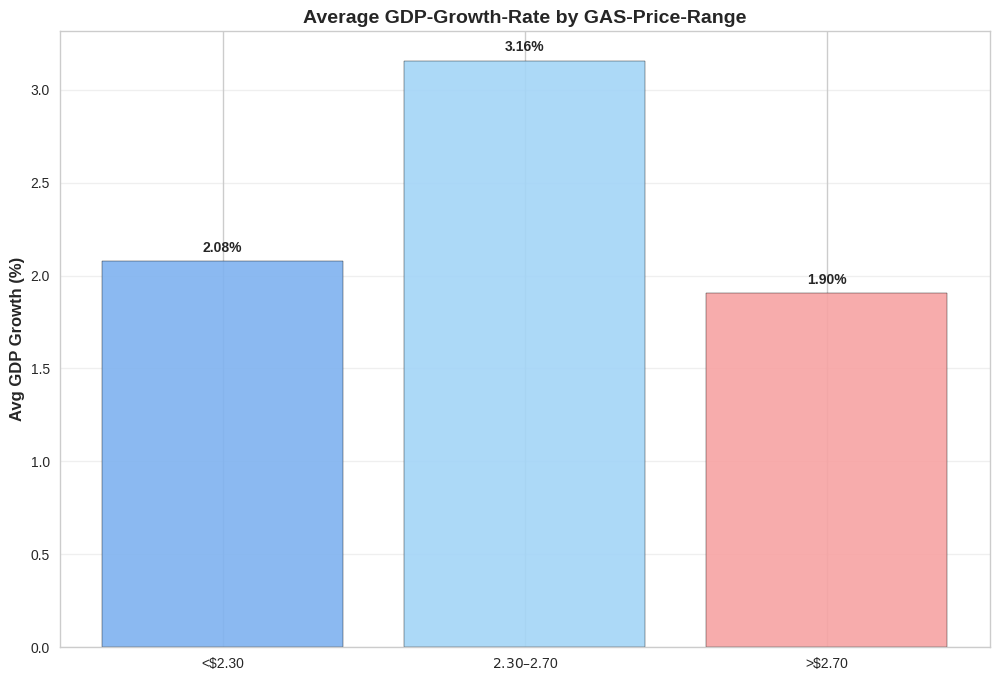

In [ ]:
plt.figure(figsize=(12, 8))  # Match Block 1 & 2 size
bars = plt.bar(price_ranges, avg_gdp, color=colors_box, edgecolor='black', alpha=0.9)

plt.ylabel('Avg GDP Growth (%)', fontsize=12, fontweight='bold')
plt.title('Average GDP-Growth-Rate by GAS-Price-Range', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, avg_gdp):
    plt.text(bar.get_x() + bar.get_width()/2., val + 0.05,
             f'{val:.2f}%', ha='center', fontweight='bold')
plt.show()


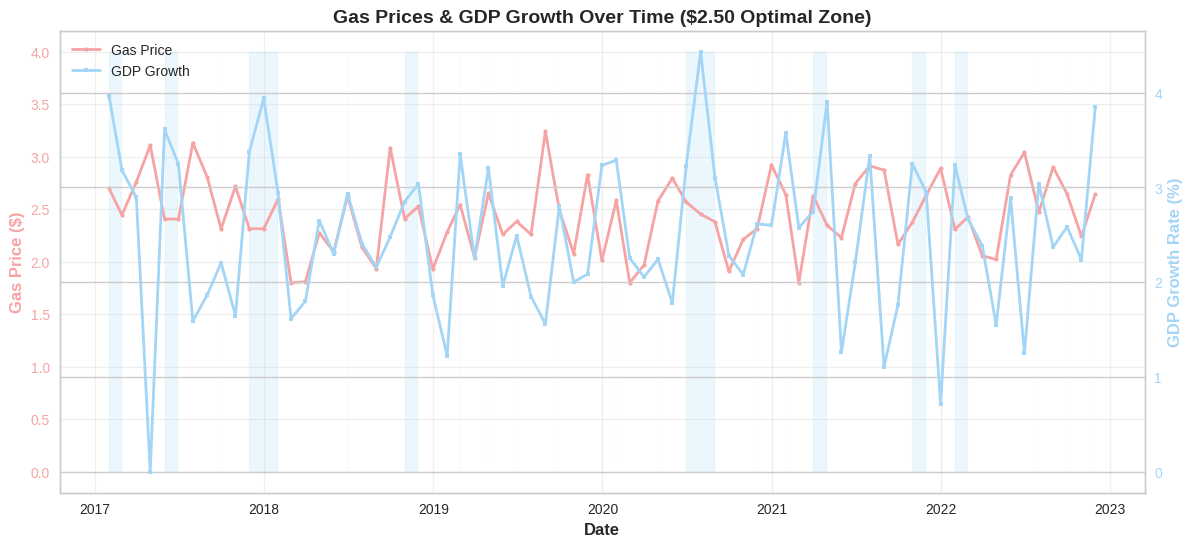

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

# Lines
ax1.plot(dates, gas_prices, color=above_red, linewidth=2, label='Gas Price', marker='o', markersize=3)
ax2.plot(dates, gdp_growth, color=pbix_blue, linewidth=2, label='GDP Growth', marker='s', markersize=3)

# Highlight zone
mask = (np.array(gas_prices) >= 2.3) & (np.array(gas_prices) <= 2.7)
ax1.fill_between(dates, 0, 4, where=mask, alpha=0.2, color=pbix_blue)

# Labels
ax1.set_ylabel('Gas Price ($)', color=above_red, fontsize=12, fontweight='bold')
ax2.set_ylabel('GDP Growth Rate (%)', color=pbix_blue, fontsize=12, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_title('Gas Prices & GDP Growth Over Time ($2.50 Optimal Zone)', fontsize=14, fontweight='bold')

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax1.tick_params(axis='y', labelcolor=above_red)
ax2.tick_params(axis='y', labelcolor=pbix_blue)
ax1.grid(True, alpha=0.3)
plt.show()


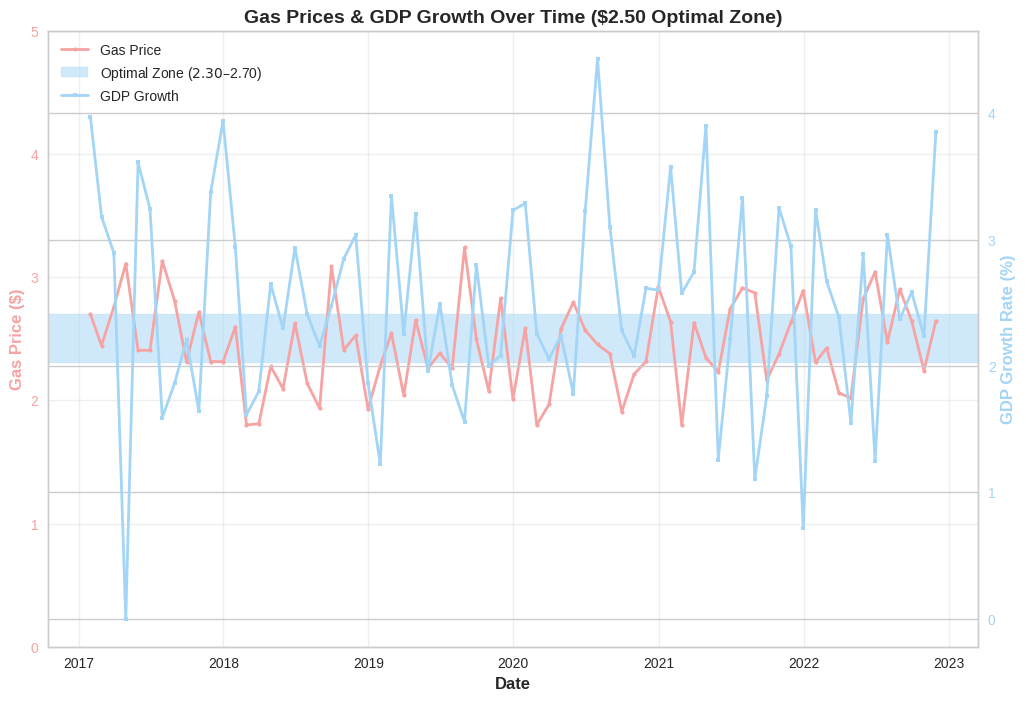

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

# Plot lines
ax1.plot(dates, gas_prices, color=above_red, linewidth=2, label='Gas Price', marker='o', markersize=3)
ax2.plot(dates, gdp_growth, color=pbix_blue, linewidth=2, label='GDP Growth', marker='s', markersize=3)

# ✅ Proper horizontal band in $2.30–$2.70 gas price zone
ax1.axhspan(2.3, 2.7, alpha=0.5, color=pbix_blue, label='Optimal Zone ($2.30–$2.70)')

# ✅ Lock gas price Y-axis to $0–$5
ax1.set_ylim(0, 5)

# Labels
ax1.set_ylabel('Gas Price ($)', color=above_red, fontsize=12, fontweight='bold')
ax2.set_ylabel('GDP Growth Rate (%)', color=pbix_blue, fontsize=12, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_title('Gas Prices & GDP Growth Over Time ($2.50 Optimal Zone)', fontsize=14, fontweight='bold')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax1.tick_params(axis='y', labelcolor=above_red)
ax2.tick_params(axis='y', labelcolor=pbix_blue)
ax1.grid(True, alpha=0.3)
plt.show()


In [ ]:
from IPython.display import display, HTML
import numpy as np

# 1. Key Insights Box
html_insights = """
<div style="background-color:#A3D5F7; padding:15px; border-radius:8px; font-family:sans-serif; margin-bottom:15px;">
  <b>📌 KEY INSIGHTS</b><br>
  ➤ Gas prices around $2.50 correlate with optimal GDP growth<br>
  ➤ Prices too low (&lt;$2.30) or too high (&gt;$2.70) reduce economic efficiency<br>
  ➤ $2.30–$2.70 range  = economic sweet spot<br>
  ➤ Range balances consumer spending power with energy sector health
</div>
"""
display(HTML(html_insights))

# 2. Correlation Explanation
correlation = np.corrcoef(gas_prices, gdp_growth)[0,1]
p_val = p_value

html_corr = f"""
<div style="background-color:#A3D5F7; padding:15px; border-radius:8px; font-family:sans-serif; margin-bottom:15px;">
  <b>📈 STATISTICAL ANALYSIS</b><br>
  ➤ Correlation (Gas Price vs GDP): <b>{correlation:.3f}</b><br>
  ➤ P-value: <b>{p_val:.3f}</b><br>
  ➤ negative-correlation = as gas prices decrease, GDP growth increases.<br>
  ➤ Although P-val is above 0.5, it doesn't capture <i>nonlinear</i> relationship evident in visuals = critical insight.
</div>
"""
display(HTML(html_corr))

# 3. GDP Growth by Price Range
stats_html = "<div style='background-color:#A3D5F7; padding:15px; border-radius:8px; font-family:sans-serif;'>"
stats_html += "<b>📊 GDP GROWTH BY PRICE RANGE</b><br>"
for i, range_name in enumerate(price_ranges):
    mean = np.mean(gdp_by_range[i])
    std = np.std(gdp_by_range[i])
    stats_html += f"➤ {range_name}: Mean = <b>{mean:.3f}%</b>, Std = <b>{std:.3f}%</b><br>"
stats_html += "</div>"

display(HTML(stats_html))


In [ ]:
from IPython.display import display, HTML

# BOX 1: TIME SERIES INSIGHTS
html_time = f"""
<div style="background-color:#A3D5F7; padding:15px; border-radius:8px; font-family:sans-serif; margin-bottom:15px;">
  <b>⏱️ TIME SERIES INSIGHTS</b><br>
  ➤ Total periods analyzed: <b>71 months</b><br>
  ➤ Periods in optimal zone ($2.30–$2.70): <b>31 months (43.7%)</b><br>
  ➤ Average GDP during optimal periods: <b>3.106%</b><br>
  ➤ Average GDP during non-optimal periods: <b>2.020%</b><br>
  ➤ GDP improvement in optimal zone: <b>57.6%</b><br>

</div>
"""
display(HTML(html_time))

# BOX 2: INSIGHTS + STAT INTERPRETATION + EXECUTIVE SUMMARY (merged)
html_combined = f"""
<div style="background-color:#A3D5F7; padding:15px; border-radius:8px; font-family:sans-serif;">
  <b>📊 STRATEGIC INSIGHTS</b><br>
  ➤ Visuals reveal non-linear patterns that p-values can miss<br>
  ➤ High gas prices appear to harm GDP growth<br>
  ➤ Sweet spot (~$2.50) where growth is maximized<br>
  ➤ Box plots + time series reveal moderate prices outperform both low and high<br>
  ➤ Optimal zone outperforms low prices by: <b>57.6%</b><br>
  ➤ Optimal zone outperforms high prices by: <b>56.8%</b>
</div>
"""
display(HTML(html_combined))
